# Assignment 1: Find a path from the start to the goal

This assignment is worth 15/100 points. 

You need to do this assignment with a group of maximum 3 people in total.

You will program path-finding algorithms using informed and uninformed search and compare them. You will need to implement the following algorithms:

Uninformed Search: 
- BFS
- DFS

Informed Search:
- A*

Answer to all the questions in english, argument, and justify your answers using the obtained results.

### Deadline
March 3th, 2023 at 23.59

### Some Instructions
- You need to fill in your answers here and submit this jupyter notebook via NEO.
- It should run smoothly.
- Any compilation error will affect your total score. 


### Important before starting! 

- DO NOT copy the answers from internet nor from your classmates.
- If there are two or more groups that were discovered cheeting, then they will be penalized with 0/15.
- Use your brain and the material seen in class to program this assignment.
- You should be able to explain and modify your code according to your (or my) needs. 

### Names
You and your classmate names:
- Nicolas Cari Rodriguez
- Christian Rivero Arnez


## Code for drawing the map

The following code will help you draw the map. You don't need to modify it.

#### Import libraries

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from queue import Queue
from queue import LifoQueue
from queue import PriorityQueue
import math

import time
import tracemalloc
import math

#### Read map from file and define where the start and goal positions are

In [ ]:
map_file = "map1.txt"
start_char = '1'
goal_char = '4'
tree_char = '2'
water_char = '3'
visited_char = '5'

def read_map_file(file_name = "map1.txt"):
    i = 0
    j = 0
    my_map = []
    start = [0,0]
    goal  = [0,0]
    with open(file_name) as f:
        lines = f.readlines()
        for line in lines:
            line_arr = []
            j = 0
            for char in line:
                # skip carry char
                if char != '\n':
                    line_arr.append(int(char))
                # start char is 1
                if char == start_char:
                    start = [j, i]
                # end char is 3
                if char == goal_char:
                    goal = [j, i]

                j += 1
            my_map.append(line_arr)
            i += 1
        return my_map, start, goal

my_map, start, goal = read_map_file()
print('Start at:', start)
print('Goal at:', goal)

Start at: [2, 6]
Goal at: [16, 2]


#### Draw the map

In [ ]:
# inspired by: https://stackoverflow.com/questions/38973868/adjusting-gridlines-and-ticks-in-matplotlib-imshow
def draw_map(my_map, path = []):
    xlen = len(my_map[0])
    ylen = len(my_map)
    colormap = colors.ListedColormap(["white","yellow",'lightgreen', 'cyan', 'red', 'violet'])
    
    # set ticks top and bottom
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    plt.figure()
    im = plt.imshow(my_map, cmap = colormap)
    ax = plt.gca();

    # Major ticks
    ax.set_xticks(np.arange(0, xlen, 1))
    ax.set_yticks(np.arange(0, ylen, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(0, xlen, 1))
    ax.set_yticklabels(np.arange(0, ylen, 1))

    # Minor ticks
    ax.set_xticks(np.arange(-.5, xlen, 1), minor=True)
    ax.set_yticks(np.arange(-.5, ylen, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
    
    for step in path:
        plt.plot(step[0], step[1], marker='o', color='b')
        
    ax.text(start[0]-0.3, start[1]+ 0.3, 'S', fontsize=13)
    ax.text(goal[0]-0.3, goal[1]+ 0.3, 'G', fontsize=13)

    plt.show()

## Exercise Problem-Solver Agent

1. What is an Agent?

An agent is something or someone who acts autonomously, perceives the environment, adapts to changes and completes objectives.

2. What is a Problem-Solver Agent? Define a problem-solver agent to find the path between two points in a map.

They are a kind of intelligent agent that formulates an objective and the problem to later search, solve and execute a set of actions to achieve its objective.

## Exercise Uninformed Search

#### color code:

Here is what every element in the map means:

- white (0):   blank space
- yellow (1):  starting position
- green (2):   trees
- cyan (3):    water
- red (4):     goal position
- brown (5):  expanded state (already visited)


For uninformed search let's suppose:
- the agent can't go through trees nor water (they are obstacles).
- the cost to go from one state to another is 1.

## BFS

1. Implement BFS algorithm to find the path between start and goal. To help you out with this task you can complete the code below using what we have seen in class.

In [ ]:
import queue
actions = ['U', 'D', 'L', 'R']
nonAvailablePathTypes=set([int(tree_char),int(water_char),int(visited_char)])
class State:
    def __init__(self):
        self.father = None
        self.value = None

def get_path(state):
    path = []
    current_state = state
    while(current_state != None):
      path.append(current_state.value)
      current_state = current_state.father
    return path
    # your code here

def goal_test(state, goal):
    if(state[0]==goal[0] and state[1]==goal[1]):
      return True
    return False
    pass
    # your code here
    
def convertCoordsToHash(coords):
  return str(coords[1])+"y"+str(coords[0])+"x"

def tf(state, action, my_map):
    x = state[0]
    y = state[1]
    limit_x = len(my_map[0]) - 1
    limit_y = len(my_map) - 1
    next_state = None
    if action == 'L' and x > 0:
        next_state =  [x-1, y]
    elif action == 'R' and x < limit_x:
        next_state = [x+1, y]
    elif action == 'U' and y > 0:
        next_state = [x, y-1]
    elif action == 'D' and y < limit_y:
        next_state = [x, y+1]
    if next_state is not None:
        if(int(my_map[next_state[1]][next_state[0]]) not in nonAvailablePathTypes):
            return True, next_state
    return False, _

def bfs(start, goal, actions, my_map):
    start_state = State()
    start_state.value = start
    open_states = Queue()
    open_states.put(start_state)
    coordsAddedToQueue=set()
    coordsAddedToQueue.add(convertCoordsToHash(start))
    while (open_states.qsize()!=0):
        state = open_states.get()
        my_map[state.value[1]][state.value[0]] = int(visited_char)
        for action in actions:
            nextStateFound,nextState=tf(state.value,action,my_map)
            if(nextStateFound):
              nextCoordsHash=convertCoordsToHash(nextState)
              if(nextCoordsHash not in coordsAddedToQueue):
                nextStateObj=State()
                nextStateObj.value=nextState
                nextStateObj.father=state
                if (goal_test(nextState, goal)):
                  return (True, nextStateObj)
                coordsAddedToQueue.add(nextCoordsHash)
                open_states.put(nextStateObj)
    return False, _


tiempo de ejecucion de algoritmo 0.0005 seconds
Solution found?  True
Cost:  4


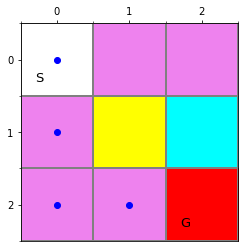

In [ ]:
my_map, start, goal = read_map_file("map_prueba.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)


tiempo de ejecucion de algoritmo 0.0046 seconds
Solution found?  True
Cost:  30


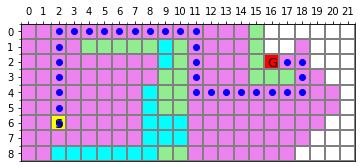

In [ ]:
my_map, start, goal = read_map_file("map1.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0264 seconds
Solution found?  True
Cost:  27


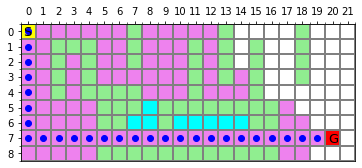

In [ ]:
my_map, start, goal = read_map_file("map2.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0244 seconds
Solution found?  True
Cost:  22


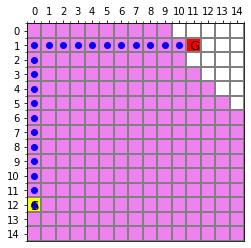

In [ ]:
my_map, start, goal = read_map_file("map3.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0137 seconds
Solution found?  True
Cost:  21


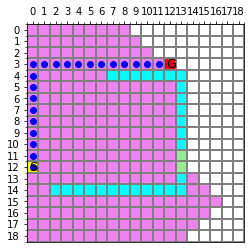

In [ ]:
my_map, start, goal = read_map_file("map4.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0021 seconds
Solution found?  True
Cost:  21


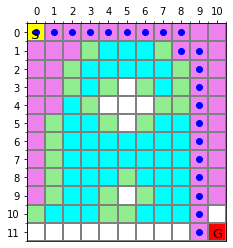

In [ ]:
my_map, start, goal = read_map_file("amogus.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0017 seconds
Solution found?  False


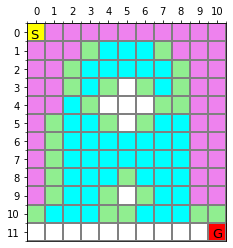

In [ ]:
path=[]
my_map, start, goal = read_map_file("amogusWoutExit.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
if(found):
  path = get_path(goal_state.father)
  print('Cost: ',len(path))
draw_map(my_map, path)

if there is no path, we check all the positions it can and return Solution found: false which means there is no result.

## DFS

1. Implement DFS algorithm to find the path between start and goal.

In [ ]:
def convertCoordsToHash(coords):
  return str(coords[1])+"y"+str(coords[0])+"x"


def dfs(start, goal, actions, my_map):
    start_state = State()
    start_state.value = start
    open_states = LifoQueue()
    open_states.put(start_state)
    coordsAddedToQueue=set()
    coordsAddedToQueue.add(convertCoordsToHash(start))
    while (open_states.qsize()!=0):
        state = open_states.get()
        my_map[state.value[1]][state.value[0]] = int(visited_char)
        for action in actions:
            nextStateFound,nextState=tf(state.value,action,my_map)
            if(nextStateFound):
              nextCoordsHash=convertCoordsToHash(nextState)
              if(nextCoordsHash not in coordsAddedToQueue):
                nextStateObj=State()
                nextStateObj.value=nextState
                nextStateObj.father=state
                if (goal_test(nextState, goal)):
                  return (True, nextStateObj)
                coordsAddedToQueue.add(nextCoordsHash)
                open_states.put(nextStateObj)
            # your code here
    return False, _

tiempo de ejecucion de algoritmo 0.0048 seconds
Solution found?  True
Cost:  56


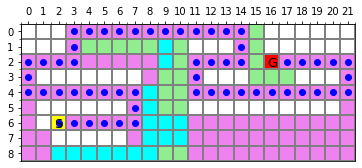

In [ ]:
my_map, start, goal = read_map_file('map1.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0022 seconds
Solution found?  True
Cost:  45


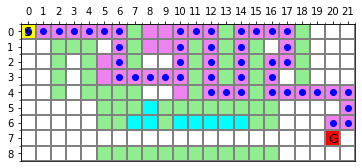

In [ ]:
my_map, start, goal = read_map_file('map2.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0062 seconds
Solution found?  True
Cost:  84


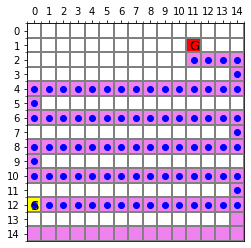

In [ ]:
my_map, start, goal = read_map_file('map3.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0036 seconds
Solution found?  True
Cost:  69


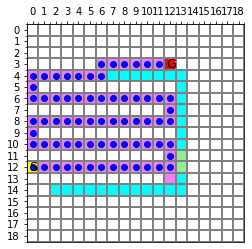

In [ ]:
my_map, start, goal = read_map_file('map4.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

##2. Now change the order of the actions. Do you have a shorter path (hint: to answer this, calculate the cost of the path and experiment with diferent order for the actions)? Why is that?

###using our first map as an example

tiempo de ejecucion de algoritmo 0.0039 seconds
Solution found?  True
Cost:  84


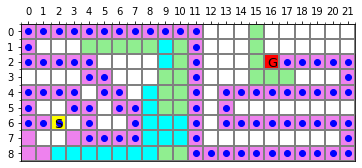

In [ ]:
# your code here
actions = ['U','R','D','L']
my_map, start, goal = read_map_file('map1.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0053 seconds
Solution found?  True
Cost:  76


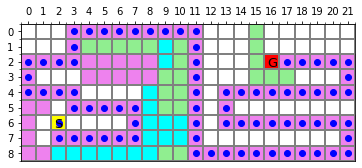

In [ ]:
# your code here
actions = ['U','L','R','D']
my_map, start, goal = read_map_file('map1.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0056 seconds
Solution found?  True
Cost:  40


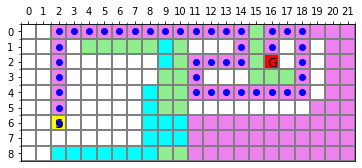

In [ ]:
# your code here
actions = ['D','L','R','U']
my_map, start, goal = read_map_file('map1.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

We can see that our cost is different if we change our actions at the beginning. If we use "Down Left Right Up" as our movement set, we get the least cost of our examples.

###using map2 as another example

tiempo de ejecucion de algoritmo 0.0015 seconds
Solution found?  True
Cost:  31


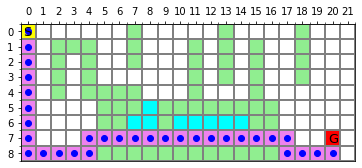

In [ ]:
# your code here
actions = ['U','R','D','L']
my_map, start, goal = read_map_file('map2.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0015 seconds
Solution found?  True
Cost:  31


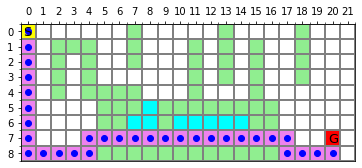

In [ ]:
# your code here
actions = ['U','L','R','D']
my_map, start, goal = read_map_file('map2.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0031 seconds
Solution found?  True
Cost:  53


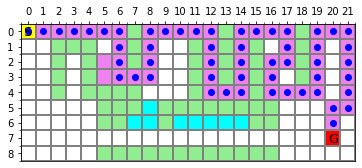

In [ ]:
# your code here
actions = ['D','L','R','U']
my_map, start, goal = read_map_file('map2.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

We can see that when using map2, the shortest path changes from "Down Left Right Up" to "Up Left Right Down". Note that the order of left or right doesn't matter in this case, since when the path reaches the bottom left corner it can only move to the right.

###using amogus.txt as an example

tiempo de ejecucion de algoritmo 0.0007 seconds
Solution found?  True
Cost:  25


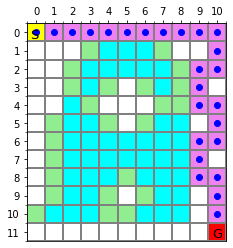

In [ ]:
# your code here
actions = ['D','L','R','U']
my_map, start, goal = read_map_file('amogus.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0009 seconds
Solution found?  True
Cost:  23


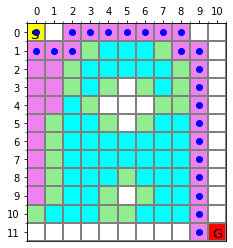

In [ ]:
# your code here
actions = ['U','L','R','D']
my_map, start, goal = read_map_file('amogus.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0010 seconds
Solution found?  True
Cost:  21


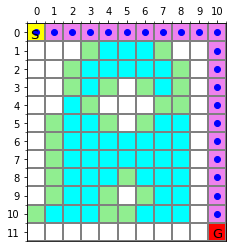

In [ ]:
# your code here
actions = ['U','L','D','R']
my_map, start, goal = read_map_file('amogus.txt')
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

In this case, the best path to take is to first go to the right and then go down. We can modify the order of directions so that the algorithm takes this path first. This confirms that there is no universal best order for all exercises, as each one may have a different order of directions that leads to the best result. Additionally, it is possible to obtain the best path with DFS, but this won't be achieved in every map.

#3. Does it happen the same thing when you change the order of actions for BFS (hint: to answer this calculate the cost of the path and experiment with diferent order for the actions)? Experiment, show your results and discuss.

###using our first map as an example

tiempo de ejecucion de algoritmo 0.0025 seconds
Solution found?  True
Cost:  30


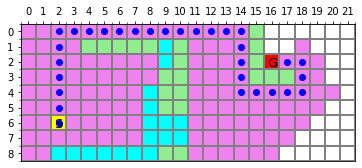

In [ ]:
# your code here
actions = ['U','R','D','L']
my_map, start, goal = read_map_file('map1.txt')
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0048 seconds
Solution found?  True
Cost:  30


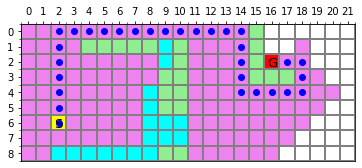

In [ ]:
# your code here
actions = ['U','L','R','D']
my_map, start, goal = read_map_file('map1.txt')
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0064 seconds
Solution found?  True
Cost:  30


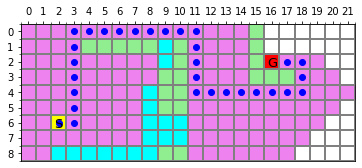

In [ ]:
# your code here
actions = ['D','L','R','U']
my_map, start, goal = read_map_file('map1.txt')
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

###using map2 as another example

tiempo de ejecucion de algoritmo 0.0031 seconds
Solution found?  True
Cost:  27


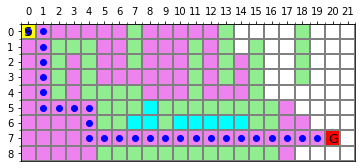

In [ ]:
# your code here
actions = ['U','R','D','L']
my_map, start, goal = read_map_file('map2.txt')
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0031 seconds
Solution found?  True
Cost:  27


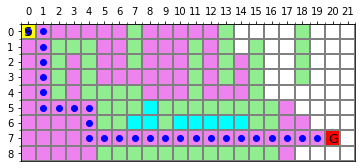

In [ ]:
# your code here
actions = ['U','L','R','D']
my_map, start, goal = read_map_file('map2.txt')
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0031 seconds
Solution found?  True
Cost:  27


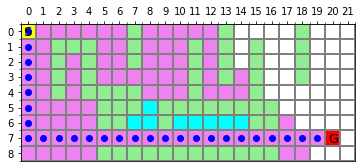

In [ ]:
# your code here
actions = ['D','L','R','U']
my_map, start, goal = read_map_file('map2.txt')
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

###using amogus.txt as an example

tiempo de ejecucion de algoritmo 0.0018 seconds
Solution found?  True
Cost:  21


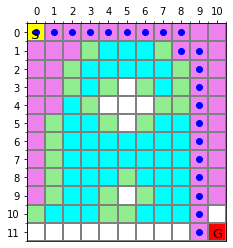

In [ ]:
# your code here
actions = ['D','L','R','U']
my_map, start, goal = read_map_file('amogus.txt')
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0018 seconds
Solution found?  True
Cost:  21


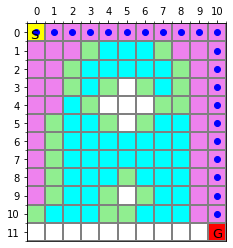

In [ ]:
# your code here
actions = ['U','L','R','D']
my_map, start, goal = read_map_file('amogus.txt')
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0019 seconds
Solution found?  True
Cost:  21


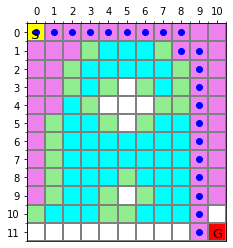

In [ ]:
# your code here
actions = ['U','L','D','R']
my_map, start, goal = read_map_file('amogus.txt')
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

After several tests, changing the order of actions, it can be seen that the cost is the same regardless of whether the path changes (there is more than one optimal path), this occurs because bfs is being used and it guarantees us the optimal path. Even though the order of actions doesn't affect the path found, the number of visited states got affected.

#4. Did BFS or DFS find the optimal path? What is the cost of it? Give some examples

tiempo de ejecucion de algoritmo 0.0073 seconds
Solution found?  True
Cost:  21


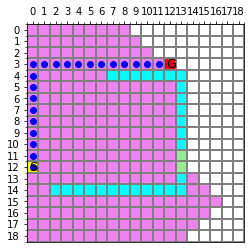

In [ ]:
my_map, start, goal = read_map_file("map4.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)


tiempo de ejecucion de algoritmo 0.0041 seconds
Solution found?  True
Cost:  69


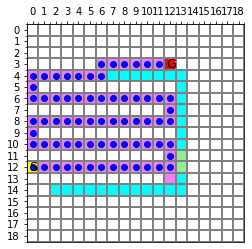

In [ ]:
my_map, start, goal = read_map_file("map4.txt")
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0102 seconds
Solution found?  True
Cost:  22


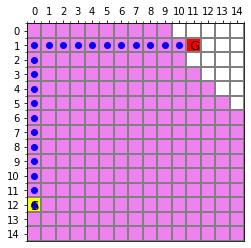

In [ ]:
my_map, start, goal = read_map_file("map3.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0051 seconds
Solution found?  True
Cost:  84


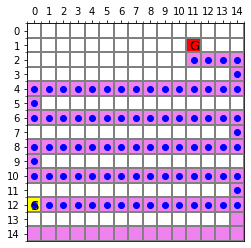

In [ ]:
my_map, start, goal = read_map_file("map3.txt")
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

like we've seen before, BFS gives us a shorter path than DFS, with BFS we make sure that the cost we have is optimal. We will get an answer with DFS but the cost will not be the best one every time we run it

#5. Execute BFS and DFS for the map2.txt file. Which one finds a better path? Which one would you choose for the path-finding problem? 

Solution found?  True
Cost:  27


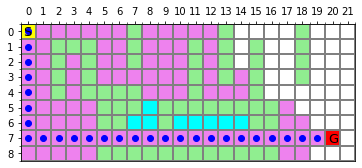

In [ ]:
actions = ['U', 'D', 'L', 'R']
my_map, start, goal = read_map_file("map2.txt")
found, goal_state = bfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)
# your code here

Solution found?  True
Cost:  45


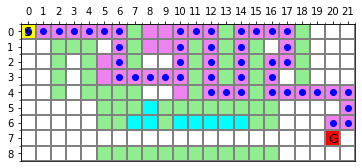

In [ ]:
my_map, start, goal = read_map_file("map2.txt")
found, goal_state = dfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)
# your code here

Like we can see in our example, when we ran BFS we found the optimal path with a cost of 27, for a path finding algorithm BFS is marginally better than DFS

# Exercises Informed Search

##1. Let's suppose:
- the agent can now go through trees and water.
- the cost to go from one state to another is:
    - empty spaces: 1
    - trees: 3
    - water: 5
    
Solve the problem using A* using the Manhattan distance as a heuristic. 

You may use map3.txt and map4.txt here.

In [ ]:
nonAvailablePathTypes=set([int(visited_char)])
class State:
    def __init__(self):
        self.father = None
        self.value = None
        self.H=0
        self.G=0
        self.F=0
    def __lt__(self,otherState):
      return self.F<otherState.F

def get_path(state):
    path = []
    current_state = state
    while(current_state != None):
      path.append(current_state.value)
      current_state = current_state.father
    return path
    # your code here

def testGoal(state, goal):
    if(state[0]==goal[0] and state[1]==goal[1]):
      return True
    return False
    pass
    # your code here

def tf(state, action, my_map):
    x = state[0]
    y = state[1]
    limit_x = len(my_map[0]) - 1
    limit_y = len(my_map) - 1
    next_state = None
    if action == 'L' and x > 0:
        next_state =  [x-1, y]
    elif action == 'R' and x < limit_x:
        next_state = [x+1, y]
    elif action == 'U' and y > 0:
        next_state = [x, y-1]
    elif action == 'D' and y < limit_y:
        next_state = [x, y+1]
    if next_state is not None:
        if(int(my_map[next_state[1]][next_state[0]]) not in nonAvailablePathTypes):
            return True, next_state
    return False, _
    
def getCost(successor, my_map):
    x, y = successor
    char = my_map[y][x]
    cost=0
    if char == int('0') or char==int('4'):
        cost = 1
    elif char == int(tree_char):
        cost = 3
    elif char == int(water_char):
        cost = 5

    return cost

def h(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def verifyIfObjectIn(obj,iterable):
    q=iterable.queue()
    for val in q:
      if val==obj:
        return True
    return False

def convertCoordsToHash(coords):
  return str(coords[1])+"y"+str(coords[0])+"x"

def AStar(initialState,goalState,Actions,my_map):
  start_state = State()
  start_state.value = initialState
  open=PriorityQueue()
  open.put(start_state)
  addedToQ={}
  visited_nodes = 0
  addedToQ[convertCoordsToHash(initialState)]=0
  while(open.qsize()!=0):
    state=open.get()
    if my_map[state.value[1]][state.value[0]]==int(visited_char):
      continue
    visited_nodes += 1
    my_map[state.value[1]][state.value[0]]=int(visited_char)
    if(testGoal(state.value,goalState)):
      return True,state,visited_nodes

    for action in Actions:
      found,successor=tf(state.value,action,my_map)
      if found and my_map[successor[1]][successor[0]]!=int(visited_char):
        successorState=State()
        successorState.value=successor
        successorState.father=state
        successorState.H=h(successor,goalState)
        successorState.G=state.G+getCost(successor,my_map)
        successorState.F=successorState.H+successorState.G
        coordsStr=convertCoordsToHash(successor)
        if coordsStr in addedToQ.keys():
          if  successorState.G>addedToQ[coordsStr]:
              continue
        open.put(successorState)
        addedToQ[coordsStr]=successorState.G
  return False,_, visited_nodes

# your code here

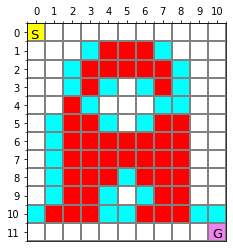

tiempo de ejecucion de algoritmo 0.0033 seconds
Solution found?  True
Cost:  23
estado expandido por A* 51


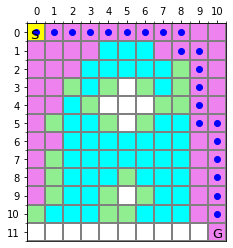

In [ ]:
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("amogusWoutExit.txt")
draw_map(my_map, path)
tic = time.perf_counter()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.G)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

# your code here

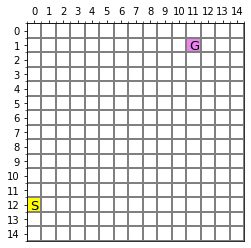

tiempo de ejecucion de algoritmo 0.0028 seconds
Solution found?  True
Cost:  22
estado expandido por A* 67


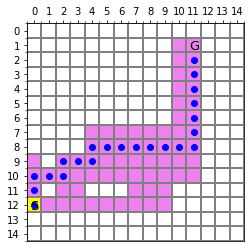

In [ ]:
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("map3.txt")
draw_map(my_map, path)
tic = time.perf_counter()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.G)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

# your code here

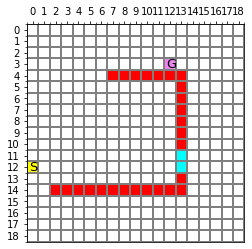

tiempo de ejecucion de algoritmo 0.0054 seconds
Solution found?  True
Cost:  21
estado expandido por A* 112


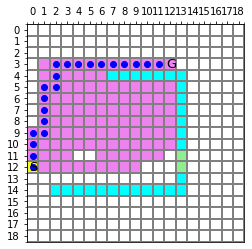

In [ ]:
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("map4.txt")
draw_map(my_map, path)
tic = time.perf_counter()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.G)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

# your code here

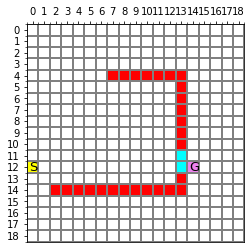

tiempo de ejecucion de algoritmo 0.0011 seconds
Solution found?  True
Cost:  16
estado expandido por A* 21


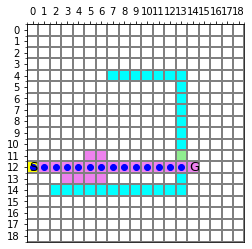

In [ ]:
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("map4Modified.txt")
draw_map(my_map, path)
tic = time.perf_counter()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.G)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

# your code here

##2. How many states expands A*?

in map3 we expanded 66 times, in map4 we expanded 110 times, each time the value got popped out of our queue the state expanded.

##3. Is A* optimal and complete for this case? Justify your answers

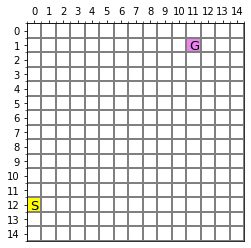

tiempo de ejecucion de algoritmo 0.0051 seconds
Solution found?  True
Cost:  22
estado expandido por A* 67


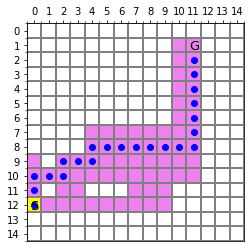

In [ ]:
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("map3.txt")
draw_map(my_map, path)
tic = time.perf_counter()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.G)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

# your code here

tiempo de ejecucion de algoritmo 0.0052 seconds
Solution found?  True
Cost:  22


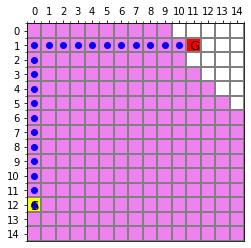

In [ ]:
nonAvailablePathTypes=set([int(tree_char),int(water_char),int(visited_char)])
my_map, start, goal = read_map_file("map3.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

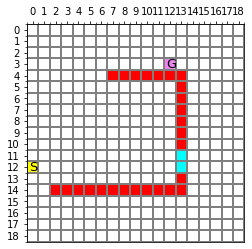

tiempo de ejecucion de algoritmo 0.0088 seconds
Solution found?  True
Cost:  21
estado expandido por A* 112


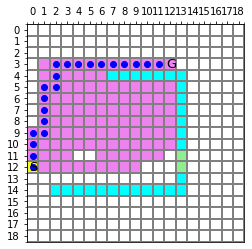

In [ ]:
nonAvailablePathTypes=set([int(visited_char)])
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("map4.txt")
draw_map(my_map, path)
tic = time.perf_counter()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.G)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

# your code here

tiempo de ejecucion de algoritmo 0.0090 seconds
Solution found?  True
Cost:  21


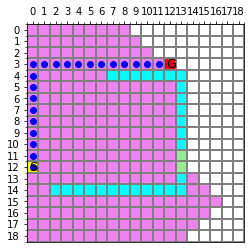

In [ ]:
nonAvailablePathTypes=set([int(tree_char),int(water_char),int(visited_char)])
my_map, start, goal = read_map_file("map4.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)
nonAvailablePathTypes=set([int(visited_char)])

we ran the results of map 3 and map 4 using A* and BFS, we can see that they have the same result, since we already showed that BFS gives us the optimal path we can conclude that A* is showing us an optimal solution

##4. Create an empty map of 21x21 put the start position in one extreme, the goal position in another and execute BFS and A* in this map and compare both algorithms. Answer some questions such as: what is the states space? which one expands/visits less states? which one does a better job? 

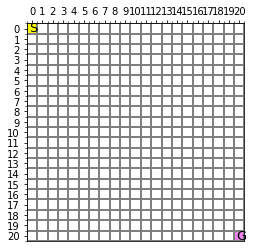

tiempo de ejecucion de algoritmo 0.0380 seconds
Solution found?  True
Cost:  40
estado expandido por A* 304


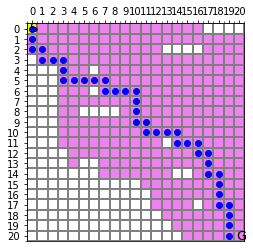

In [ ]:
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("21x21map.txt")
draw_map(my_map, path)
tic = time.perf_counter()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.F)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

# your code here

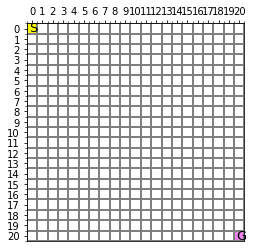

Current memory usage is 0.018682MB; Peak was 0.143386MB
Solution found?  True
Cost:  40
estado expandido por A* 304


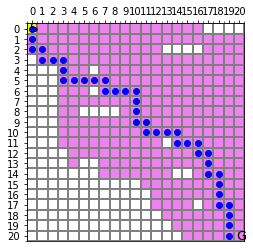

In [ ]:
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("21x21map.txt")
draw_map(my_map, path)
tracemalloc.start()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.F)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

# your code here

tiempo de ejecucion de algoritmo 0.0618 seconds
Solution found?  True
Cost:  40


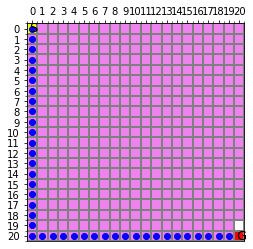

In [ ]:
my_map, start, goal = read_map_file("21x21map.txt")
tic = time.perf_counter()
found, goal_state = bfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

Current memory usage is 0.018572MB; Peak was 0.111724MB
Solution found?  True
Cost:  40


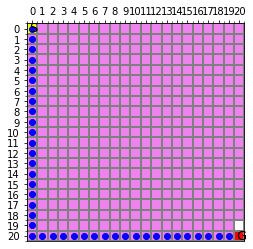

In [ ]:
my_map, start, goal = read_map_file("21x21map.txt")
tracemalloc.start()
found, goal_state = bfs(start, goal, actions, my_map)
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

tiempo de ejecucion de algoritmo 0.0113 seconds
Solution found?  True
Cost:  240


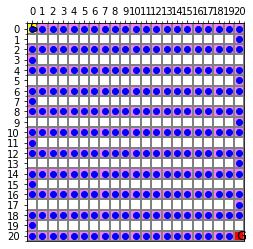

In [ ]:
my_map, start, goal = read_map_file("21x21map.txt")
tic = time.perf_counter()
found, goal_state = dfs(start, goal, actions, my_map)
toc = time.perf_counter()
print(f"tiempo de ejecucion de algoritmo {toc - tic:0.4f} seconds")
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

Current memory usage is 0.180018MB; Peak was 0.189519MB
Solution found?  True
Cost:  240


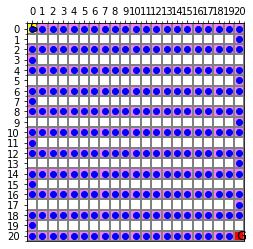

In [ ]:
my_map, start, goal = read_map_file("21x21map.txt")
tracemalloc.start()
found, goal_state = dfs(start, goal, actions, my_map)
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

Current memory usage is 0.013644MB; Peak was 0.032544MB
Solution found?  True
Cost:  40


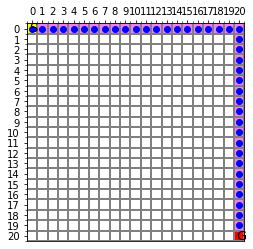

In [ ]:
actions = ['U', 'L', 'D', 'R']
my_map, start, goal = read_map_file("21x21map.txt")
tracemalloc.start()
found, goal_state = dfs(start, goal, actions, my_map)
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

Current memory usage is 0.01358MB; Peak was 0.03248MB
Solution found?  True
Cost:  40


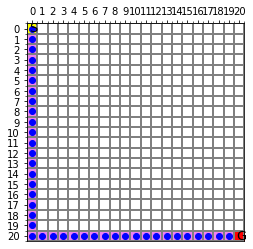

In [ ]:
actions = ['U', 'R', 'L', 'D']
my_map, start, goal = read_map_file("21x21map.txt")
tracemalloc.start()
found, goal_state = dfs(start, goal, actions, my_map)
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',len(path))
draw_map(my_map, path)

As we can see in our examples, when using A* we expand to less states and we get the same cost as using the BFS algorithm, so using A* is more desirable and does a better job. If the heuristic we were using wouldn't be as good as the Manhattan one, our answer might be different so using BFS would be the safer approach, if we are sure our heuristic is correct then using A* is better.

# Probando otras heuristicas con A*

##⭐ Heuristica Euclidiana

In [ ]:
def h(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

memoria actual que tiene, cantidad memoria maxima que ha llegado a usar (129798, 139325)
Solution found?  True
Cost:  40.0
estado expandido por A* 410


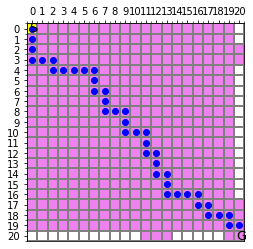

In [ ]:
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("21x21map.txt")
tracemalloc.start()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
print(f"memoria actual que tiene, cantidad memoria maxima que ha llegado a usar {tracemalloc.get_traced_memory()}")
tracemalloc.stop()
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.F)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

# your code here

##⭐Heuristica de Chebyshev
esta es la distancia máxima entre las coordenadas de dos puntos.

In [ ]:
def h(p1, p2):
    return max(abs(p1[0]-p2[0]),abs(p1[1]-p2[1]))

memoria actual que tiene, cantidad memoria maxima que ha llegado a usar (19576, 112226)
Solution found?  True
Cost:  40
estado expandido por A* 431


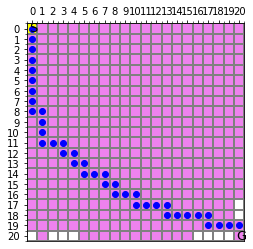

In [ ]:
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("21x21map.txt")
tracemalloc.start()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
print(f"memoria actual que tiene, cantidad memoria maxima que ha llegado a usar {tracemalloc.get_traced_memory()}")
tracemalloc.stop()
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.F)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

##⭐ Heuristica de Minkowski
Es una generalizacion de la distancia euclidiana y manhatan, cuando p=1 es la distancia manhatan, cuando p=2 es la distancia euclidiana, en este caso probaremos p=3

In [ ]:
def h(p1, p2,p=3):
    return ((abs(p1[0] - p2[0]))**p + (abs(p1[1] - p2[1]))**p)**(1/p)

memoria actual que tiene, cantidad memoria maxima que ha llegado a usar (23480, 111083)
Solution found?  True
Cost:  40.0
estado expandido por A* 411


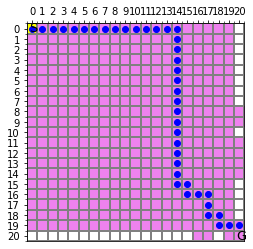

In [ ]:
actions = ['U', 'D', 'L', 'R']
path=[]
my_map, start, goal = read_map_file("21x21map.txt")
tracemalloc.start()
found, goal_state, visited_nodes = AStar(start, goal, actions, my_map)
print(f"memoria actual que tiene, cantidad memoria maxima que ha llegado a usar {tracemalloc.get_traced_memory()}")
tracemalloc.stop()
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost: ',goal_state.F)
print("estado expandido por A*", visited_nodes)
draw_map(my_map, path)

After testing three different heuristic we've seen that all of them were complete and optimal, but the Manhatan one expanded much fewer states, so we can conclude that a heuristic could be optimal and complete, but we could find another one better

referencias:

1.   Timer (ver tiempo ejecucion): https://realpython.com/python-timer/
2.   Tracemalloc (ver memoria utilizada): https://www.geeksforgeeks.org/monitoring-memory-usage-of-a-running-python-program/



